In [1]:
# Import external packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

[*********************100%%**********************]  1 of 1 completed


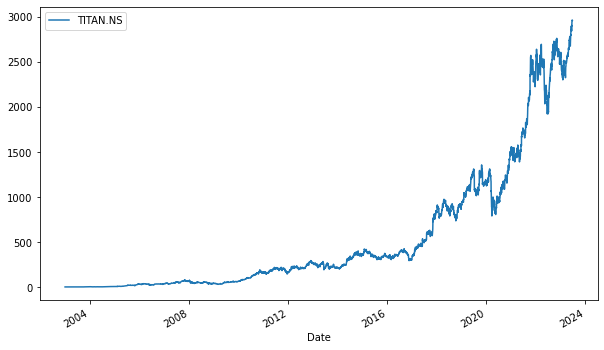

In [3]:
# Extract data from Yahoo Finance
ticker = 'TITAN.NS'
stock_data = pd.DataFrame()
stock_data[ticker] = yf.download(ticker, start = '2003-01-01', end ='2023-06-23')['Adj Close']
# Plot TITAN closing prices
stock_data.plot(figsize = (10, 6));

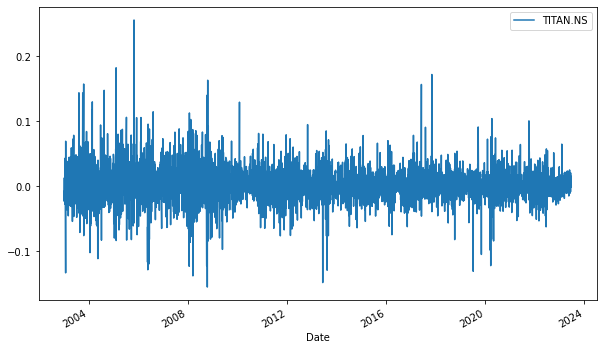

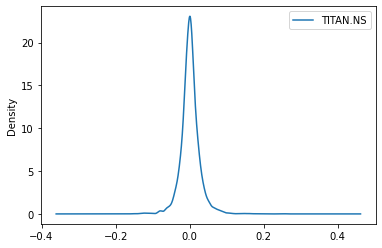

In [4]:
# Calculate historical daily log returns for the entire historical period and input into a Data Frame
log_returns = np.log(1 + stock_data.pct_change())
# Show all the log returns
log_returns.plot(figsize = (10,6));
# Show the distribution of the log returns
log_returns.plot.density();
# The First Chart Shows the value of returns on each day and the second chart shows its distribution.

In [5]:
# Calculate key statistic measures
mean = log_returns.mean()
variance = log_returns.var()
STD = log_returns.std()

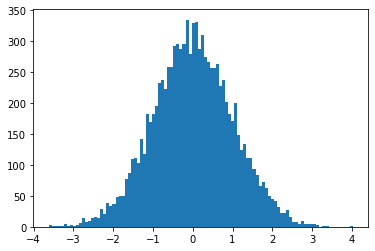

In [6]:
# How to generate 10,000 random numbers betwen 0 and 1.
random_numbers = np.random.rand(10000)
# Use those randomly generated numbers to sample from a normal distribution
normal_random_numbers = norm.ppf(random_numbers)
# Plot each of the 10,000 randombly generated numbers from the normal distribution
plt.hist(normal_random_numbers, bins = 100);

In [7]:
# Simulate future daily returns using the above method
t_intervals = 250
simulations = 10000
daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals,simulations))
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated)
daily_simplereturns_simulated.shape

(250, 10000)

In [8]:
# Using returns, calculate future price progression in each simulation
# Latest known stock price for TITAN
last_price = stock_data.iloc[-1]
# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated)
# Set the first row to the starting stock price
price_list[0] = last_price
price_list

array([[2960.65771484, 2960.65771484, 2960.65771484, ..., 2960.65771484,
        2960.65771484, 2960.65771484],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

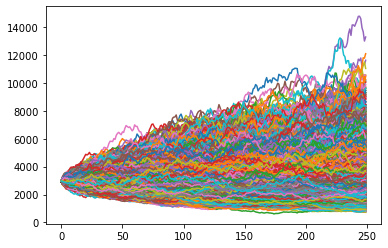

In [10]:
# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_simplereturns_simulated[t]
# Plot simulated future TITAN prices
plt.plot(price_list);

In [14]:
# Calculate worst, avg and best scenarios
WorstSim = round(price_list[-1].min(),2)
AvgSim = round(price_list[-1].mean(),2)
BestSim = round(price_list[-1].max(),2)
# Examine the worst, average, and best stock price sceanrios
print("Best and Worst Cases")
print(f"Worst Simulation /share: {WorstSim}")
print(f"Avg Simulation /share: {AvgSim}")
print(f"Best Simulation /share: {BestSim}")
# Set up confidence intervals
Mean_Day250Prices = price_list[-1].mean()
SD_Day250Prices = price_list[-1].std()
UpperInterval_1SD = Mean_Day250Prices + 1 * SD_Day250Prices
LowerInterval_1SD = Mean_Day250Prices - 1 * SD_Day250Prices
UpperInterval_2SD = Mean_Day250Prices + 2 * SD_Day250Prices
LowerInterval_2SD = Mean_Day250Prices - 2 * SD_Day250Prices
# Print out the price range within the confidence intervals
print("\n" + "Confidence Intervals")
print(f"1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: {round(LowerInterval_1SD,2)} and {round(UpperInterval_1SD,2)}")
print(f"2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: {round(LowerInterval_2SD,2)} and {round(UpperInterval_2SD,2)}")

Best and Worst Cases
Worst Simulation /share: 724.92
Avg Simulation /share: 3222.55
Best Simulation /share: 13298.08

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: 1858.15 and 4586.95
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: 493.75 and 5951.35
